# Pobranie danych i import bibliotek


In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup 
import matplotlib.pyplot as plt
from scipy import stats

Poniższe fragmenty kodu są przekopiowane z pliku Zad2c+3d. Pobieram dane z wikipedii dotyczące bezrobocia w latach 2003-2021, a następnie liczę średnią stopę bezrobocia w danym roku. W dalszej części notatnika, będę badał czy te dane mają rozkład normalny

In [2]:
URL = "https://pl.wikipedia.org/wiki/Demografia_Polski"
resp = requests.get(URL) 
if resp.status_code == 200:    # czy stronę udało się otworzyć?
    soup = BeautifulSoup(resp.content,'html.parser')  # utowrzenie drzewa wyszukiwań
    tab = soup.find_all('table',{'class':"wikitable"})   # ekstrakcja tabel z drzewa wyszukiwań

for tag in soup.find_all(class_="reference"): # usuwanie wikipediowych referencji
    tag.decompose()

In [3]:
bezrobocie = pd.read_html(str(tab[7]))[0]
bezrobocie.set_index('Rok', inplace=True)
bezrobocie = bezrobocie.astype(float)
bezrobocie = bezrobocie / 10

In [4]:
bezrobocie['Średnia'] = bezrobocie.mean(axis=1)
bezrobocie_srednia = bezrobocie['Średnia'].to_frame()

bezrobocie_srednia = bezrobocie_srednia.round(2)

display(bezrobocie_srednia)

,Średnia
Rok,
2021,5.96
2020,5.92
2019,5.43
2018,6.07
2017,7.27
2016,8.94
2015,10.48
2014,12.32
2013,13.53


# Zad 4B

Zbadam średnie bezrobocie w polsce do opisu rozkładem normalnym

In [5]:
X = bezrobocie_srednia['Średnia'].values

Funkcja rozkładu normalnego:

In [6]:
def rozklad_norm(parametry, x):
    mu, sigma = parametry
    return np.exp(-(x-mu)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

Badając czy dane mają rozkład normalny przyjmujemy hipotezę H_0: "Dane mają rozkład normalny", oraz hipotezę H_1: "Dane nie mają rozkładu normalnego". Jeśli z testu otrzymamy p-wartość mniejszą niż 0.05 należy odrzucić hipotezę H_0.

Test Shapiro:

In [7]:
print(f'test Shapiro, p-wartość = {stats.shapiro(X)[1]}')

test Shapiro, p-wartość = 0.198216512799263


P-wartość jest większa od 0.05 zatem nie mamy podstaw do odrzucania hipotezy o rozkładzie normalnym danych.

Test d'Agostino:

In [8]:
print(f'test D’Agostino i Pearsona, p-wartość = {stats.normaltest(X)[1]}\n')

test D’Agostino i Pearsona, p-wartość = 0.6330922039302163



/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


P-wartość jest większa od 0.05 zatem nie mamy podstaw do odrzucania hipotezy o rozkładzie normalnym danych.

Jako, że testy nie odrzuciły hipotez, możemy przejść do wyznaczenia współczynników mu i sigma

In [9]:
mu, sigma= X.mean(), X.std()
print(f'mu = {mu}\nsigma = {sigma}')

mu = 11.603684210526314
sigma = 4.395227328443668


Oraz do ilustracji danych oraz modelu na wykresie

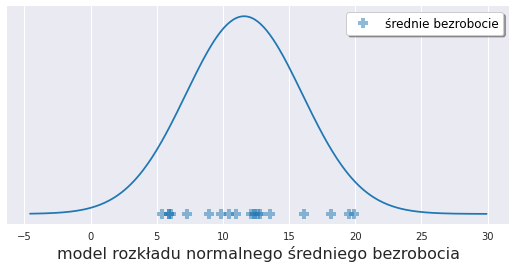

In [12]:
os_x = np.linspace(X.min()-10, X.max()+10, num=300)
os_y = rozklad_norm([mu, sigma], os_x)

with plt.style.context('seaborn'):  
    plt.figure(figsize=(9,4))
    plt.plot(X, np.zeros_like(X), 'P', 
             markersize=10, alpha=0.5, markerfacecolor='tab:blue', markeredgecolor='tab:blue', 
             label='średnie bezrobocie')
    plt.plot(os_x, 25*os_y, color='tab:blue')
    plt.xlabel('model rozkładu normalnego średniego bezrobocia', fontsize=16)
    plt.yticks([])

plt.legend(shadow=True, fontsize=12)
plt.show()